# Predykcja ataku phishingowego w wiadomości <b>e-mail</b> za pomocą <b><i>nadzorowanego nauczania maszynowego</i></b>
Dataset: 
<ul>
    <li><i><b>Phishing Email Curated Datasets</b></i></li>
    <ul>
        <li><a href="https://zenodo.org/records/8339691" target="_blank">https://zenodo.org/records/8339691</a></li>
    </ul>
</ul>

### Pobieranie niezbędnych modułów
<ul>
    <li> pandas - praca z <i>Data Framami</i></li>
    <li> numpy - obliczenia</li>
    <li> matplotlib.pyplot - wizualizacja</li>
    <li> sklearn - wszelakie narzędzia do <i>Machine Learningu</i></li>
</ul>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import import_ipynb

### Wczytanie uprzednio przygotowanego Data Framu

In [2]:
learning_set = pd.read_csv('ML_DataFrame.csv')
print(learning_set.head())

   Unnamed: 0  label  urls_count  protocol  contains_ip  url_length  \
0           0    1.0         1.0       0.0          0.0        21.0   
1           1    1.0         1.0       0.0          0.0        25.0   
2           2    1.0         3.0       0.0          0.0       110.0   
3           3    0.0         3.0       0.0          0.0        22.0   
4           4    1.0         1.0       0.0          0.0       136.0   

   TLD_alpha  subdomain_level  slash_count  dots_count  hyphens_count  \
0        1.0              0.0          3.0         1.0            0.0   
1        1.0              1.0          2.0         2.0            0.0   
2        1.0              1.0          6.0         5.0            0.0   
3        0.0              1.0          2.0         2.0            0.0   
4        1.0              2.0          4.0         4.0            2.0   

   has_non_latin  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [3]:
print(learning_set.isna().sum())
learning_set.dropna(inplace=True)

Unnamed: 0          0
label               0
urls_count          0
protocol            0
contains_ip         0
url_length          0
TLD_alpha           0
subdomain_level    84
slash_count         0
dots_count          0
hyphens_count       0
has_non_latin       0
dtype: int64


### Wybieranie X i y
X:
<ul>
<li> urls_count </li>
<li>protocol </li>
<li> contains_ip </li>
<li> url_length </li>
<li> TLD_alpha </li>
<li> subdomain_level </li>
<li> slash_count </li>
<li> dots_count </li>
<li> hyphens_count </li>
<li> has_non_latin </li>
</ul>
y:
<ul>
    <li> label </li>
</ul>

In [4]:
X = learning_set.loc[:, 'urls_count':'has_non_latin'].values
y = learning_set.loc[: , 'label'].values
print(X.shape, y.shape)

(41632, 10) (41632,)


### Rozdzielanie X, y na treningowe i testowe zestawy

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Normalizujemy wartość <b><i>X</i></b>-ów

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33305, 10) (8327, 10) (33305,) (8327,)


### Szukanie najlepszego <b> n </b> dla <i>KNeighborsClassifier</i>


2 0.8453224450582443
3 0.8624954965773988
4 0.8570913894559865
5 0.8634562267323166
6 0.8647772306953284
7 0.865377687042152
8 0.8609343100756575
9 0.8614146751531163
10 0.8641767743485048
11 0.8674192386213522
12 0.8651375045034226
13 0.8647772306953284
14 0.8615347664224811
15 0.8616548576918458
16 0.8612945838837517
17 0.8617749489612105
18 0.8633361354629518
19 0.8634562267323166
20 0.8611744926143869
21 0.8608142188062928
22 0.8609343100756575
23 0.8597333973820104
24 0.8611744926143869
25 0.8602137624594692
26 0.859012849765822
27 0.8580521196109043
28 0.8586525759577279
29 0.8578119370721748


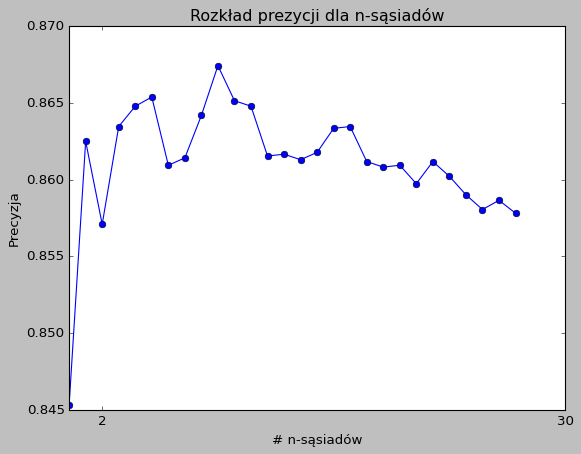

In [19]:
# Nauczanie
n_range = range(2, 30)
scores = []
for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(n, score)
    scores.append(score)

# Wizualizacja
fig, ax = plt.subplots()
values = scores
labels = n_range
ax.plot(values, marker='o')
ax.set_xlabel('# n-sąsiadów')
ax.set_xticks([2, 30]) #naprawic oś X
ax.set_ylabel('Precyzja')
ax.set_title('Rozkład prezycji dla n-sąsiadów')

plt.show()

### Szukanie najlepszego modelu

In [16]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=11),
}

results = []
for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(score)


### Walidacja wybranych modeli

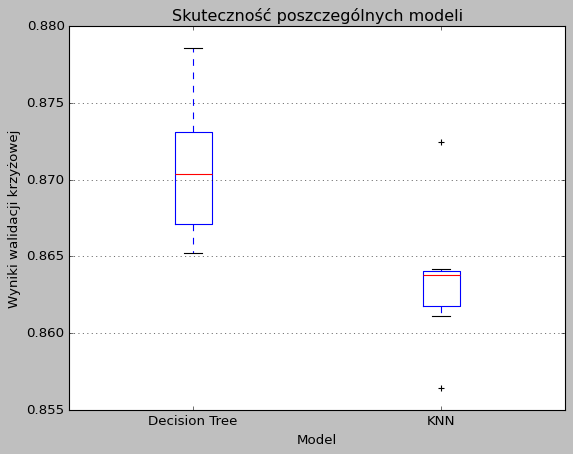

In [20]:
plt.style.use('classic')
fig, ax = plt.subplots()

ax.boxplot(results, labels=models.keys())
ax.set_title('Skuteczność poszczególnych modeli')
ax.set_xlabel('Model')
ax.set_ylabel('Wyniki walidacji krzyżowej')
#ax.set_ylim(0.7, 1)
plt.grid(axis='y', visible=True)
plt.show()

In [11]:
tree_mean = np.round(results[0].mean(), 4)
knn_mean = np.round(results[1].mean(), 4)
tree_std = np.round(results[0].std(), 4)
knn_std = np.round(results[1].std(), 4)
print('Precyzje:\n- Decision Tree: {}\n- KNN: {}'.format(tree_mean, knn_mean))
print('Odchylenia standardowe:\n- Decision Tree: {}\n- KNN: {}'.format(tree_std, knn_std))

Precyzje:
- Decision Tree: 0.8712
- KNN: 0.8645
Odchylenia standardowe:
- Decision Tree: 0.0047
- KNN: 0.0032


### Nauczanie najskuteczniejszego modelu
Najlepszy okazał się <b><i>DecisionTreeClassifier</i></b>
<ul>
    <li>Accuracy ~0.87 &plusmn; 0.0045</li>
</ul>

In [12]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Walidacja modelu

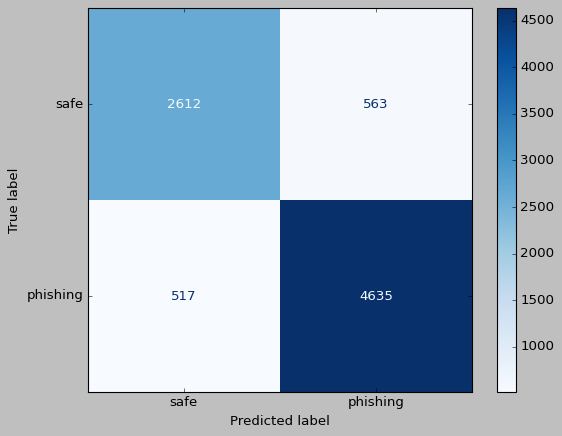

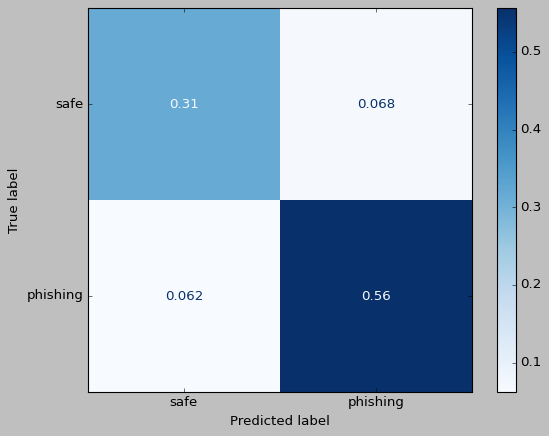

In [13]:
y_pred = tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Wartości bezwzględne
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['safe', 'phishing'])

cm_display.plot(cmap='Blues')
plt.show()

# Wartości względne
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix/np.sum(confusion_matrix),
    display_labels=['safe', 'phishing'])
    
cm_display.plot(cmap='Blues')
plt.show()

In [14]:
target_names = ['safe', 'phishing']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        safe       0.83      0.82      0.83      3175
    phishing       0.89      0.90      0.90      5152

    accuracy                           0.87      8327
   macro avg       0.86      0.86      0.86      8327
weighted avg       0.87      0.87      0.87      8327



### Test na przykładzie z żyćka

In [15]:
mail_example = {
'sender': 'Marcin Sawiński <Marcin.Sawinski@ue.poznan.pl>',
'subject': 'Projekty zaliczeniowe z PSI',
'body': '''
        Drodzy Studenci,

        Chciałbym Was prosić o zapisanie w arkuszu tematów projektów zaliczeniowych oraz wskazanie osób w zespołach (numer teamu            przy nazwisku).

        https://uniekonpoznan.sharepoint.com/:x:/s/AI_2023_2024/EQ5avb31cRpAliTAmGtxQ1gB5_YtB0YJTh3c9t7n30uLdQ?e=yLzaTU

        Pozdrawiam,

        Marcin Sawinski
        --
        Wiadomość wysłana przez system USOS.
        Łączna liczba adresatów tej wiadomości: 117

        Nadawcą korespondencji i jednocześnie administratorem Państwa danych osobowych jest Uniwersytet Ekonomiczny w Poznaniu,             al. Niepodległości 10, 61-875 Poznań, z którym można skontaktować się listownie lub poprzez wiadomość e-mail (rodo@ue.poznan.pl)       Państwa dane osobowe przetwarzane będą w celu prowadzenia niniejszej korespondencji i przez czas jej trwania. Przysługuje           Państwu prawo dostępu do danych, ich sprostowania, ograniczenia przetwarzania, usunięcia, żądania sprzeciwu wobec                   przetwarzania oraz wniesienia skargi do Prezesa Urzędu Ochrony Danych Osobowych. Szczegółowe informacje na temat ochrony            danych osobowych dostępne są w Polityce prywatności.
'''
}
#TODO: DOKOŃCZYĆ

# Rezultat projektu
Przy pomocy <b><i>DecisionTreeClassifier</i></b> udało się wytrenować model z wynikami:
<ul>
    <li> (accuracy) ~     </li>   
    <li> (recall) ~       </li>
    <li> (F1) ~       </li>
</ul>
</br>
Problemy podczas projektu
<ul>
    <li> dostęp do API </li>
    <ul>
        <li> brak sprawdzania domen w blacklistach </li>
        <li> brak sprawdzania adresów e-mail w blacklistach </li>
        <li> słabe/brak informacji o szyfrowaniu SSL </li>
        <li> brak sprawdzania wieku domeny
    </ul>
    <li> Dane zbierane w latach 2008-2022 </li>
    <li> Człowiek minimalnie obeznany w internecie </br>poradziłby sobie z klasyfikowaniem ataków phishingowych z datasetu.

</ul>